# Imports

In [82]:
import rdrobust
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Methods

Methods for Identification 

In [93]:
def sign(x):
    if x<0:
        return -1
    else:
        return 1

def treatment(x):
    if x<0:
        return 0
    else:
        return 1

def indicator(x):
    if np.abs(x)<0.1:
        return 1
    else:
        return 0

def genT(X):
    T = {}
    for i in range(len(X)):
        T = np.append(T,treatment(X[i]))
    T = np.delete(T,0)
    return T
            


Methods for Generation of Outcomes

Y(i) from Noak and Rothe 2023 donut RDD paper

In [84]:
def mu_noak(L,x):
    return sign(x)*np.power(x,2) - L*sign(x)*(np.power(x-0.1*sign(x),2)-np.power(0.1,2)*sign(x))*indicator(x)

def genY_noak(L,X,epsilon):
    Y = {}
    for i in range(len(X)):
        Y = np.append(Y,mu_noak(L,X[i]) + epsilon[i])
    Y = np.delete(Y,0)
    return Y

Basic Y(i) just with simple treatment effect

In [85]:
def mu_basic(tau,x): 
    return tau*treatment(x)

def genY_basic(tau,X,epsilon):
    Y = {}
    for i in range(len(X)):
        Y = np.append(Y,mu_basic(tau,X[i]) + epsilon[i])
    Y = np.delete(Y,0)
    return Y

# Random Variables Generation 

Seed Set-up

In [86]:
sd = np.random.default_rng(seed=42)
print(sd)

Generator(PCG64)


Generation of the R.V.'s

In [87]:
n = 1000
L = np.array([0,10,20,30,40])
tau = 2

X = np.random.uniform(-1,1,n)
epsilon = np.random.normal(0,0.5,n)

Outcomes Genereation

In [88]:
Y = genY_noak(L[0],X,epsilon)

In [89]:
Y = genY_basic(tau,X,epsilon)

In [94]:
T = genT(X)
len(T)

1000

1000
1000
1000


Text(0, 0.5, '$Y_{i}$')

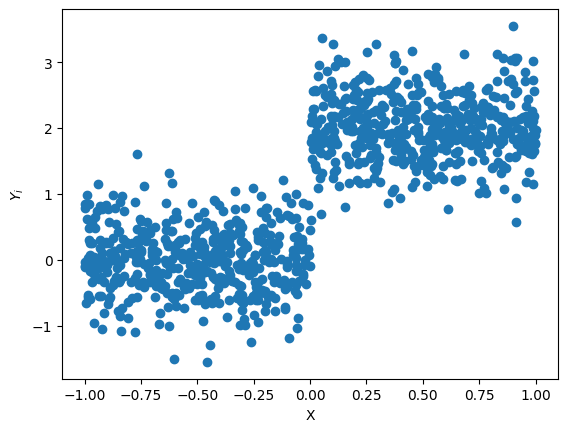

In [97]:
print(len(Y))
print(len(T))
print(len(X))
sample = pd.DataFrame({'Y': Y,'X': X,'T': T})
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('$Y_{i}$')

In [105]:
LATE = sample.Y*sample.T
LATE

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Y,6.365855,4.33238,0.137705,0.02908,0.327317,0.097077,0.116512,5.177843,3.126485,3.095434,...,0.311171,0.000128,4.481234,0.935321,5.721589,0.013355,0.210709,1.840639,2.721678,0.105781
X,1.552225,1.557594,-0.06636,-0.143955,-0.510893,-0.172776,-0.024826,0.666299,1.760176,0.088568,...,0.141201,0.002062,0.528513,-0.806,0.965476,-0.022361,0.097459,0.153053,1.228289,0.283379
T,2.523065,2.081437,0.0,0.0,0.0,0.0,0.0,2.275487,1.768187,1.759385,...,-0.0,-0.0,2.116892,0.0,2.391984,0.0,-0.0,1.356702,1.649751,-0.0


In [ ]:
n = 1000

X = np.random.uniform(-1,1,n)
epsilon = np.random.normal(0,0.5,n)